# import & 파일 불러오기

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import plotly.graph_objects as go
import plotly.express as px
# import geopandas as gpd
# import pycountry
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

rc('font', family='Malgun Gothic') # AppleGothic
plt.rcParams['axes.unicode_minus'] = False

pd.options.display.max_columns = None  # 길어서 생략된 열 다 보이게 하기

In [4]:
distribution_centers = pd.read_parquet('../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/distribution_centers_optimized.parquet')
inventory_items = pd.read_parquet('../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/inventory_items_optimized.parquet')
orders = pd.read_parquet('../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/orders_optimized.parquet')
order_items = pd.read_parquet('../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/order_items_optimized.parquet')
products = pd.read_parquet('../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/products_optimized.parquet')
users = pd.read_parquet('../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/users_optimized.parquet')
events1 = pd.read_parquet("../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided1.parquet")
events2 = pd.read_parquet("../../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided2.parquet")
events = pd.concat([events1, events2]).sort_index()

# def events_read():    
#     events1 = pd.read_parquet("../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided1.parquet")
#     events2 = pd.read_parquet("../dataset/Looker Ecommerce BigQuery Dataset/Optimization/events_optimized_divided2.parquet")
#     events = pd.concat([events1, events2]).sort_index()
#     return events
# events = events_read()

# 불필요한 부분

In [5]:
# orders_orderitems = order_items.merge(orders, on=['order_id', 'user_id'], how ='left', suffixes=('_item', '_order'))
# orders_orderitems.head()

,order_item_id,order_id,user_id,product_id,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,status_order,gender,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,NaT,NaT,NaT,1
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,Complete,F,2023-03-14 03:59:00+00:00,NaT,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,1
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,Complete,F,2023-12-03 13:23:00+00:00,NaT,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,4
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,Shipped,F,2023-12-23 00:17:00+00:00,NaT,2023-12-24 16:44:00+00:00,NaT,4
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,Shipped,F,2022-06-17 17:21:00+00:00,NaT,2022-06-19 19:29:00+00:00,NaT,3


In [7]:
# orders_products = orders_orderitems.merge(products, on=['product_id'], how='left', suffixes=('_orderproducts', '_products'))
# orders_products

,order_item_id,order_id,user_id,product_id,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,status_order,gender,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,cost,category,product_name,brand,retail_price,department,sku,distribution_center_id
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,NaT,NaT,NaT,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,Complete,F,2023-03-14 03:59:00+00:00,NaT,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,Complete,F,2023-12-03 13:23:00+00:00,NaT,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,Shipped,F,2023-12-23 00:17:00+00:00,NaT,2023-12-24 16:44:00+00:00,NaT,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,Shipped,F,2022-06-17 17:21:00+00:00,NaT,2022-06-19 19:29:00+00:00,NaT,3,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181754,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00,Returned,M,2020-12-23 00:07:00+00:00,2020-12-30 22:43:00+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,1,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5
181755,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,Shipped,M,2022-01-10 03:11:00+00:00,NaT,2022-01-10 03:42:00+00:00,NaT,3,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5
181756,62986,43364,34691,23546,169937,Shipped,2023-02-26 00:38:43+00:00,2023-02-25 06:53:00+00:00,NaT,NaT,999.00,Shipped,M,2023-02-25 01:58:00+00:00,NaT,2023-02-25 06:53:00+00:00,NaT,3,482.516999,Shorts,Alpha Industries Rip Stop Short,Alpha Industries,999.00,Men,C1AA157F9E8516370E3345F226EF62FC,5
181757,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaT,NaT,999.00,Shipped,M,2023-11-12 04:51:00+00:00,NaT,2023-11-14 20:44:00+00:00,NaT,1,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5


In [8]:
# all_order_data = orders_products.merge(inventory_items, on=['inventory_item_id'], how='left', suffixes=('_all', '_items'))
# all_order_data

,order_item_id,order_id,user_id,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,status_order,gender,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,cost_all,category,product_name_all,brand,retail_price,department,sku,distribution_center_id,product_id_items,inventory_item_created_at,inventory_item_sold_at,cost_items,product_category,product_name_items,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,NaT,NaT,NaT,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2021-09-09 06:17:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,Complete,F,2023-03-14 03:59:00+00:00,NaT,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2023-06-05 15:24:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,Complete,F,2023-12-03 13:23:00+00:00,NaT,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2020-04-12 14:36:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,Shipped,F,2023-12-23 00:17:00+00:00,NaT,2023-12-24 16:44:00+00:00,NaT,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2020-01-24 05:47:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,Shipped,F,2022-06-17 17:21:00+00:00,NaT,2022-06-19 19:29:00+00:00,NaT,3,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2022-09-13 16:58:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181754,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00,Returned,M,2020-12-23 00:07:00+00:00,2020-12-30 22:43:00+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,1,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5,24447,2021-10-07 09:37:00+00:00,NaT,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5
181755,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,Shipped,M,2022-01-10 03:11:00+00:00,NaT,2022-01-10 03:42:00+00:00,NaT,3,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5,24447,2023-09-16 00:38:00+00:00,NaT,404.595001,Outerwear & Coats,Darla,Alpha Industries,999.00,Men,1CE5E897CDA6AEB211DFFE8D514F4365,5
181756,62986,43364,34691,23546,169937,Shipped,2023-02-26 00:38:43+00

In [9]:
# all_order_data = all_order_data.merge(users, on =['user_id'], how='left', suffixes=('_orders', '_user'))
# all_order_data

,order_item_id,order_id,user_id,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,status_order,gender_orders,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,cost_all,category,product_name_all,brand,retail_price,department,sku,distribution_center_id,product_id_items,inventory_item_created_at,inventory_item_sold_at,cost_items,product_category,product_name_items,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,first_name,last_name,email,age,gender_user,state,street_address,postal_code,city,country,user_latitude,user_longitude,user_traffic_source,user_created_at
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,NaT,NaT,NaT,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2021-09-09 06:17:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,Kathryn,Ortega,kathrynortega@example.net,29,F,Hebei,3863 Johnson Brooks Suite 474,74199,Jinhua,China,39.388173,115.731465,Search,2021-11-27 07:33:00+00:00
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,Complete,F,2023-03-14 03:59:00+00:00,NaT,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,1,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2023-06-05 15:24:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,Terri,Alvarez,terrialvarez@example.net,35,F,Jiangsu,5374 Courtney Parkway,215007,Yulin,China,31.278607,120.642997,Organic,2022-07-15 03:59:00+00:00
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,Complete,F,2023-12-03 13:23:00+00:00,NaT,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2020-04-12 14:36:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,Rebecca,Mcgee,rebeccamcgee@example.org,49,F,Texas,7187 Michael Forge Apt. 777,75604,Longview,United States,32.512434,-94.825486,Organic,2019-06-22 13:23:00+00:00
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,Shipped,F,2023-12-23 00:17:00+00:00,NaT,2023-12-24 16:44:00+00:00,NaT,4,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2020-01-24 05:47:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,Shelly,Rogers,shellyrogers@example.net,44,F,Hyogo,6970 Cherry Extension Apt. 442,675-0137,Kakogawa City,Japan,34.718505,134.825010,Search,2022-05-17 00:17:00+00:00
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,Shipped,F,2022-06-17 17:21:00+00:00,NaT,2022-06-19 19:29:00+00:00,NaT,3,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,14235,2022-09-13 16:58:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,Mariah,Stephens,mariahstephens@example.com,59,F,England,6522 Stephens Meadows Suite 475,LA1,Lancaster,United Kingdom,54.045973,-2.794106,Search,2021-06-23 17:21:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [7]:
# cancelled_orders = all_order_data[all_order_data['status_item'] == 'Cancelled'].copy()
# returned_orders = all_order_data[all_order_data['status_item'] == 'Returned'].copy()
# complete_orders = all_order_data[all_order_data['status_item'].isin(['Complete', 'Shipped'])].copy()

In [10]:
# nums_of_brand = all_order_data['brand'].nunique()
# nums_of_product = all_order_data['product_id_all'].nunique()
# nums_of_category = all_order_data['category'].nunique()
# print(f"브랜드 수 :", nums_of_brand)
# print(f"제품 id 수 :", nums_of_product)
# print(f"카테고리 수 :", nums_of_category)

print(f"브랜드 수 :", all_order_data['brand'].nunique())
print(f"제품 id 수 :", all_order_data['product_id_all'].nunique())
print(f"카테고리 수 :", all_order_data['category'].nunique())

브랜드 수 : 2752
제품 id 수 : 29046
카테고리 수 : 26


In [9]:
all_order_data

,id_orderproducts,order_id,user_id,product_id_all,inventory_item_id,status_item,created_at_item,shipped_at_item,delivered_at_item,returned_at_item,sale_price,status_order,gender_orders,created_at_order,returned_at_order,shipped_at_order,delivered_at_order,num_of_item,id_products,cost_all,category,name,brand,retail_price,department,sku,distribution_center_id,id_orders,product_id_items,created_at_orders,sold_at,cost_items,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id,id_user,first_name,last_name,email,age,gender_user,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at_user
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,Cancelled,F,2023-05-07 07:33:00+00:00,NaT,NaT,NaT,1,14235,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,410368,14235,2021-09-09 06:17:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,83582,Kathryn,Ortega,kathrynortega@example.net,29,F,Hebei,3863 Johnson Brooks Suite 474,74199,Jinhua,China,39.388173,115.731465,Search,2021-11-27 07:33:00+00:00
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,Complete,F,2023-03-14 03:59:00+00:00,NaT,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,1,14235,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,110590,14235,2023-06-05 15:24:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,22551,Terri,Alvarez,terrialvarez@example.net,35,F,Jiangsu,5374 Courtney Parkway,215007,Yulin,China,31.278607,120.642997,Organic,2022-07-15 03:59:00+00:00
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,Complete,F,2023-12-03 13:23:00+00:00,NaT,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,4,14235,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,138236,14235,2020-04-12 14:36:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,28215,Rebecca,Mcgee,rebeccamcgee@example.org,49,F,Texas,7187 Michael Forge Apt. 777,75604,Longview,United States,32.512434,-94.825486,Organic,2019-06-22 13:23:00+00:00
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,Shipped,F,2023-12-23 00:17:00+00:00,NaT,2023-12-24 16:44:00+00:00,NaT,4,14235,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,99072,14235,2020-01-24 05:47:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,20165,Shelly,Rogers,shellyrogers@example.net,44,F,Hyogo,6970 Cherry Extension Apt. 442,675-0137,Kakogawa City,Japan,34.718505,134.825010,Search,2022-05-17 00:17:00+00:00
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,Shipped,F,2022-06-17 17:21:00+00:00,NaT,2022-06-19 19:29:00+00:00,NaT,3,14235,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,353798,14235,2022-09-13 16:58:00+00:00,NaT,0.008300,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,71954,Mariah,Stephens,mariahstephens@example.com,59,F,England,6522 Stephens Meadows Suite 475,LA1,Lancaster,United Kingdom,54.045973,-2.794106,Search,2021-06-23 17:21:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [10]:
# all_order_complete_data = all_order_data.loc[
#     (all_order_data['status_item'] == 'Complete') |
#     (all_order_data['status_item'] =='Processing') |
#     (all_order_data['status_item'] =='Shipped')
# ].copy()
# all_order_complete_data

# 쓰는 부분

In [5]:
# 전체 products 테이블에 있는 제품 정보
print(f"브랜드 수 :", products['brand'].nunique())
print(f"제품 id 수 :", products['product_id'].nunique())
print(f"카테고리 수 :", products['category'].nunique())

브랜드 수 : 2756
제품 id 수 : 29120
카테고리 수 : 26


In [6]:
# 주문에 있는 products 테이블의 제품 정보
print(f"브랜드 수 :", products[products['product_id'].isin(order_items['product_id'].unique())]['brand'].nunique())
print(f"제품 id 수 :", order_items['product_id'].nunique())
print(f"카테고리 수 :", products[products['product_id'].isin(order_items['product_id'].unique())]['category'].nunique())

브랜드 수 : 2752
제품 id 수 : 29046
카테고리 수 : 26


In [7]:
orders_merged = order_items.merge(products, on ='product_id', how='left')
orders_merged = orders_merged.merge(orders[['order_id','user_id', 'num_of_item']], on=['order_id', 'user_id'], how='left')
orders_merged = orders_merged.assign(profit = orders_merged['sale_price'] - orders_merged['cost'])

# processing, shipped 까지 complete로 넣음
# orders_complete_merged = orders_merged.loc[
#     (orders_merged['status'] == 'Complete') | (orders_merged['status'] =='Processing') | (orders_merged['status'] =='Shipped') ].copy()

orders_complete_merged = orders_merged.loc[orders_merged['status'].isin(['Complete', 'Processing', 'Shipped'])]
orders_complete_merged.head(3)


,order_item_id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost,category,product_name,brand,retail_price,department,sku,distribution_center_id,num_of_item,profit
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,1,0.0117
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,4,0.0117
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,0.0083,Accessories,Indestructable Aluminum Aluma Wallet - RED,marshal,0.02,Women,8425BC94A44E3D1BB3C8C026B2702C00,1,4,0.0117


# 총 매출, 비용, 수익, 마진율

In [8]:
# def calcaulate_summary(orders_complete_merged):
#     total_revenue = round(orders_complete_merged['sale_price'].sum(), 2)
#     total_cost = round(orders_complete_merged['cost'].sum(), 2)
#     total_profit = round(orders_complete_merged['profit'].sum(), 2)
#     total_margin_rate = ((total_revenue - total_cost) / total_cost) * 100

#     summary_df = pd.DataFrame({
#         'total_revenue': [total_revenue],
#         'total_cost': [total_cost],
#         'total_profit': [total_profit],
#         'total_margin_rate': [total_margin_rate]
#     })
#     return summary_df

# summary_df = calcaulate_summary(orders_complete_merged)
# summary_df

def calcaulate_summary(orders_complete_merged):
    total_revenue = round(orders_complete_merged['sale_price'].sum(), 2)
    total_cost = round(orders_complete_merged['cost'].sum(), 2)
    total_profit = round(orders_complete_merged['profit'].sum(), 2)
    total_margin_rate = ((total_revenue - total_cost) / total_cost) * 100
    print(f'total_revenue: {total_revenue}')
    print(f'total_cost: {total_cost}')
    print(f'total_profit: {total_profit}')
    print(f'total_margin_rate: {total_margin_rate}')
    return None

calcaulate_summary(orders_complete_merged)

total_revenue: 8127336.72
total_cost: 3909959.62
total_profit: 4217377.1
total_margin_rate: 107.86242084003925


# 브랜드 / 카테고리 / 제품id 매출액 순위 및 전체 매출 기여도

## 브랜드 별 수익-매출-비용

In [9]:
brand_performance = orders_complete_merged.groupby('brand')[['profit', 'sale_price', 'cost']].sum().reset_index()
# top_performers = brand_performance.sort_values(by='sale_price', ascending=False).head(10)
# display(top_performers)
top_brand_performance = brand_performance.nlargest(n=10, columns='sale_price')
display(top_brand_performance)

,brand,profit,sale_price,cost
447,Calvin Klein,82242.115855,154952.610408,72710.494553
701,Diesel,76431.100894,153819.549881,77388.448987
29,7 For All Mankind,67614.437061,140861.490417,73247.053357
465,Carhartt,74899.452825,140738.029172,65838.576347
2490,True Religion,63935.660840,134265.899741,70330.238901
2447,Tommy Hilfiger,52938.093481,96610.980059,43672.886578
2399,The North Face,45849.714014,83943.830109,38094.116094
2587,Volcom,38387.239193,78578.739820,40191.500627
1943,Quiksilver,35451.728262,76960.600072,41508.871810
567,Columbia,41758.452348,76706.879794,34948.427446


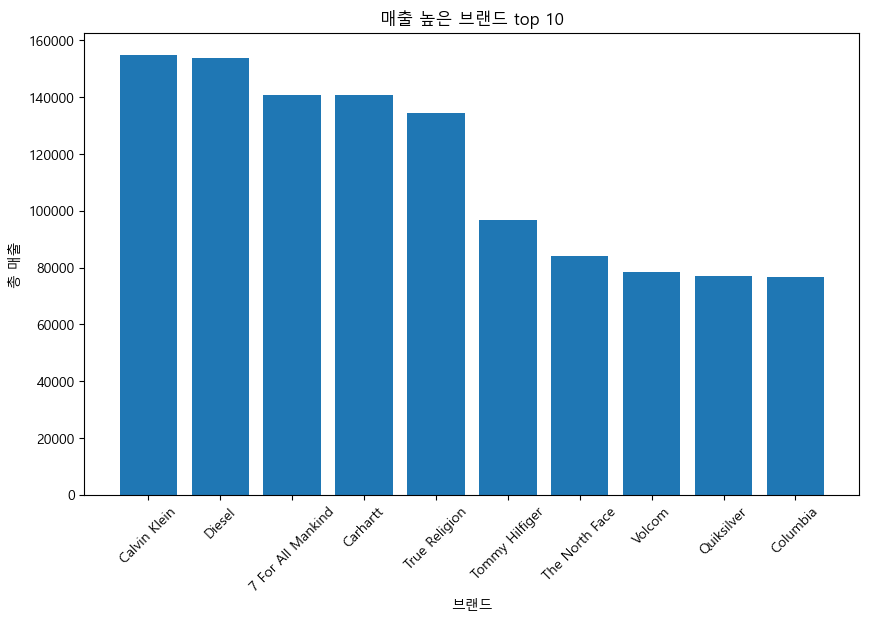

In [10]:
# top performers 시각화

plt.figure(figsize=(10,6))
plt.bar(top_brand_performance['brand'], top_brand_performance['sale_price'])
plt.xlabel('브랜드')
plt.ylabel('총 매출')
plt.xticks(rotation=45)
plt.title('매출 높은 브랜드 top 10')
plt.show()

In [11]:
# top10의 판매가 총합 vs 나머지 판매가 총합 그래프 그리기
def compare_total_sale_price_brand(df:pd.DataFrame, top_df:pd.DataFrame, criteria:str):
    criteria_list = ['brand', 'category']
    
    if criteria not in criteria_list:
        raise ValueError(f'{criteria}는 유효한 입력이 아닙니다')
    
    label_dict = {
        'brand': {
            'label': ['Top 10 performers', 'Other Brands'], 
            'title': 'Top 10 브랜드의 전체 매출 기여도'
        },
        'category': {
            'label': ['Top 5 categories', 'Other Categories'], 
            'title': '상위 카테고리 전체 매출 기여도'
        }
    }
    
    combined_top_performers = pd.DataFrame(
        {
            criteria:[label_dict[criteria]['label'][0], label_dict[criteria]['label'][1]], 
            'sales' : [top_df['sale_price'].sum(), df['sale_price'].sum() - top_df['sale_price'].sum()]
        }
    )


    # 시각화
    labels = combined_top_performers[criteria]
    sizes = combined_top_performers['sales']

    colors = ['#ff9999','#66b3ff']

    # 파이 차트 생성
    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(label_dict[criteria]['title'])
    plt.show()

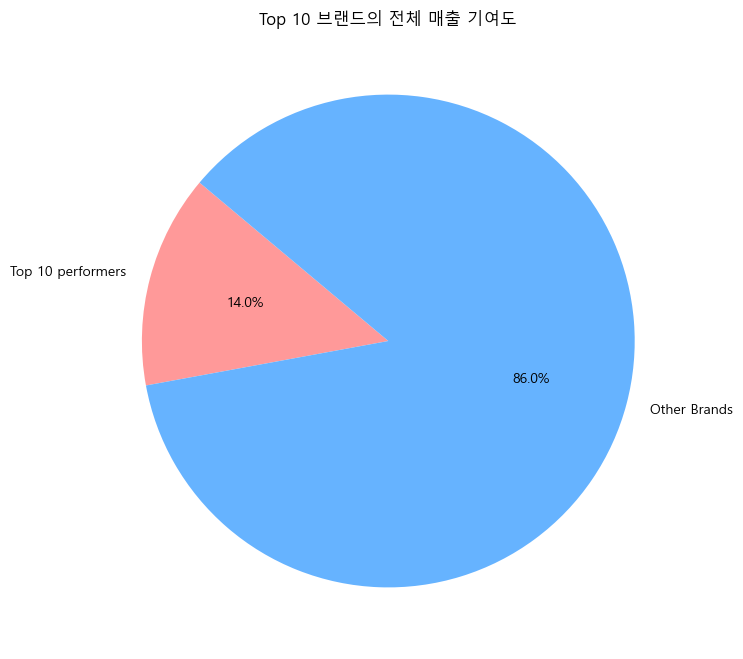

In [12]:
# total_top_performers_profit = top_performers['sale_price'].sum()

# top_performers_brands = top_performers['brand'].tolist()
# other_company_profits = orders_complete_merged.loc[~orders_complete_merged['brand'].isin(top_performers_brands), 'sale_price'].sum()
# combined_top_performers = pd.DataFrame({'brand':['Top 10 performers', 'Other Brands'], 'sales' : [total_top_performers_profit, other_company_profits]})

compare_total_sale_price_brand(df=brand_performance, top_df=top_brand_performance, criteria='brand')

## 카테고리 별 수익-매출-비용

In [13]:
category_performance = orders_complete_merged.groupby('category')[['profit', 'sale_price', 'cost']].sum().reset_index()
top_category_performance = category_performance.nlargest(5, 'sale_price')

display(top_category_performance)

,category,profit,sale_price,cost
11,Outerwear & Coats,545698.966501,983391.899374,437692.932873
7,Jeans,437515.226906,941800.611532,504285.384626
22,Sweaters,330424.016536,637020.430201,306596.413664
21,Suits & Sport Coats,297924.553950,497929.799460,200005.245510
5,Fashion Hoodies & Sweatshirts,234634.394687,488461.310351,253826.915664


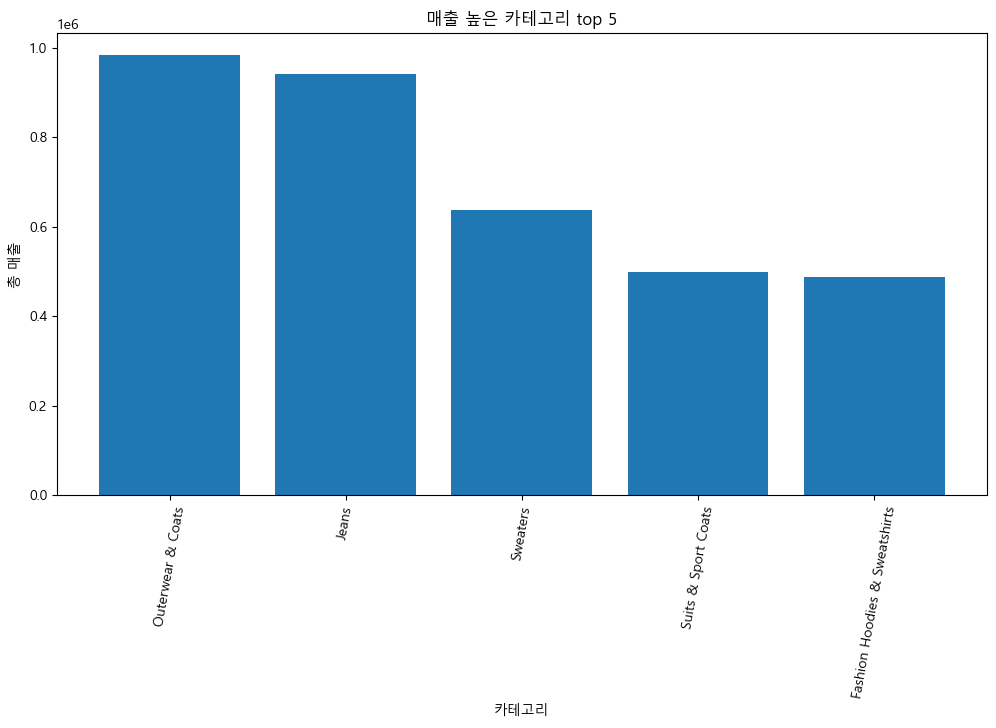

In [14]:
# top_cat_performers 시각화 

plt.figure(figsize=(12,6))
plt.bar(top_category_performance['category'], top_category_performance['sale_price'])
plt.xlabel('카테고리')
plt.ylabel('총 매출')
plt.xticks(rotation=80)
plt.title('매출 높은 카테고리 top 5')
plt.show()

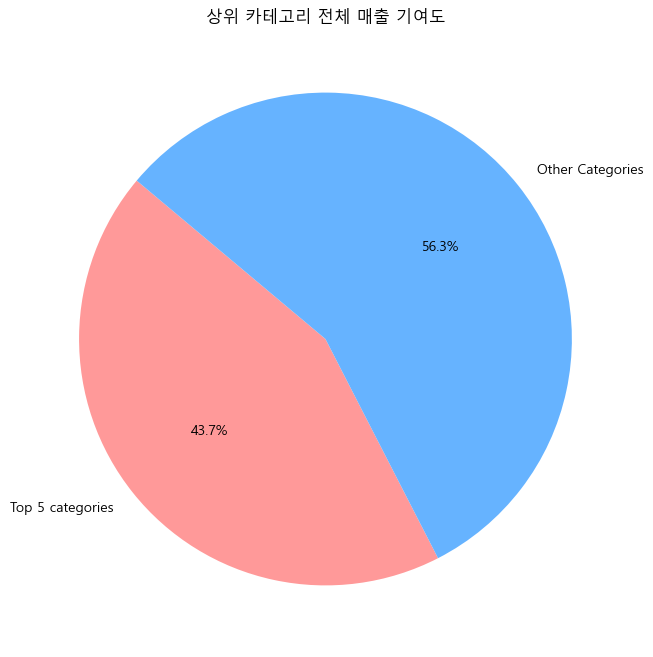

In [15]:
compare_total_sale_price_brand(df=category_performance, top_df=top_category_performance, criteria='category')

In [16]:
orders_complete_merged.groupby('category')['product_id'].nunique().sort_values(ascending=False)

## top 5 카테고리의 매출이 높을 수 밖에 없는 이유 중 하나로, 카테고리 내 상품수가 많음
### 예외. 가장 상품을 많이 보유한 intimates 는 매출 top 10에 안들음 

category
Intimates                        2331
Jeans                            1986
Tops & Tees                      1850
Fashion Hoodies & Sweatshirts    1847
Swim                             1776
Sleep & Lounge                   1760
Shorts                           1744
Sweaters                         1725
Accessories                      1548
Active                           1418
Outerwear & Coats                1408
Underwear                        1083
Pants                            1034
Dresses                           934
Socks                             899
Maternity                         895
Plus                              747
Suits & Sport Coats               731
Socks & Hosiery                   655
Pants & Capris                    607
Leggings                          555
Blazers & Jackets                 554
Skirts                            356
Suits                             188
Jumpsuits & Rompers               159
Clothing Sets                      36
Nam

In [17]:
orders_complete_merged[orders_complete_merged['category']=='Intimates']

,order_item_id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost,category,product_name,brand,retail_price,department,sku,distribution_center_id,num_of_item,profit
31,35882,24703,19697,12536,96821,Complete,2023-11-23 04:34:36+00:00,2023-11-23 09:20:00+00:00,2023-11-24 03:24:00+00:00,NaT,1.75,1.01325,Intimates,Individual Bra Extenders,Extenders,1.75,Women,359499F804EA7988921BF86C9377FB95,4,1,0.73675
32,112748,77696,62002,12536,304194,Complete,2024-01-17 03:54:46.754527+00:00,2024-01-15 10:04:24.754527+00:00,2024-01-19 05:05:24.754527+00:00,NaT,1.75,1.01325,Intimates,Individual Bra Extenders,Extenders,1.75,Women,359499F804EA7988921BF86C9377FB95,4,2,0.73675
33,117438,80895,64513,12536,316927,Processing,2023-11-04 05:25:47+00:00,NaT,NaT,NaT,1.75,1.01325,Intimates,Individual Bra Extenders,Extenders,1.75,Women,359499F804EA7988921BF86C9377FB95,4,2,0.73675
34,166143,114444,91424,12536,448518,Processing,2021-11-19 13:59:16+00:00,NaT,NaT,NaT,1.75,1.01325,Intimates,Individual Bra Extenders,Extenders,1.75,Women,359499F804EA7988921BF86C9377FB95,4,2,0.73675
180,22591,15634,12504,12265,60963,Complete,2020-12-31 01:09:44+00:00,2020-12-31 17:17:00+00:00,2021-01-04 06:13:00+00:00,NaT,2.99,1.62357,Intimates,Alivila.Y Fashion Sexy Lace & Sheer Net Linger...,Alivila.Y Fashion,2.99,Women,2B3E69A7084C76E56BE15598FC72DED6,1,1,1.36643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181617,81244,55905,44773,10453,219250,Complete,2022-10-08 05:28:26+00:00,2022-10-08 14:48:00+00:00,2022-10-10 18:18:00+00:00,NaT,903.00,512.00100,Intimates,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,Nike,903.00,Women,4801441F041958AFACA324C43C40787B,7,3,390.99900
181628,135711,93409,74506,10453,366366,Complete,2023-07-04 02:56:16+00:00,2023-07-04 11:08:00+00:00,2023-07-07 04:41:00+00:00,NaT,903.00,512.00100,Intimates,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,Nike,903.00,Women,4801441F041958AFACA324C43C40787B,7,4,390.99900
181637,180571,124384,99342,10453,487550,Complete,2023-08-04 07:18:00+00:00,2023-08-05 10:41:00+00:00,2023-08-10 05:21:00+00:00,NaT,903.00,512.00100,Intimates,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,Nike,903.00,Women,4801441F041958AFACA324C43C40787B,7,1,390.99900
181664,169722,116895,93371,10453,458228,Processing,2023-08-30 07:41:12+00:00,NaT,NaT,NaT,903.00,512.00100,Intimates,NIKE WOMEN'S PRO COMPRESSION SPORTS BRA *Outst...,Nike,903.00,Women,4801441F041958AFACA324C43C40787B,7,2,390.99900


In [18]:
product_count_per_category_brand = orders_complete_merged.groupby(['category', 'brand'])['product_id'].nunique()
product_count_per_category_brand = product_count_per_category_brand[product_count_per_category_brand > 0] # 예상대로 0미만은 존재X
product_count_per_category_brand

category     brand                  
Accessories  106Shades                   5
             180s                       15
             A:X Armani Exchange         2
             ALL BLACK                   1
             AN1225                      2
                                        ..
Underwear    Wolverine                   6
             Wrangler                    2
             YogaColors                  2
             Zimmerli of Switzerland     2
             bioworld                    3
Name: product_id, Length: 5821, dtype: int64

## 매출 높은 상위 브랜드들의 카테고리 속 비중 확인

In [19]:
# # 매출이 높은 상위 브랜드들의 카테고리 속 비중 구하기
# # top_performers_brands = top_brand_performance['brand'].tolist()

# # 매출이 높은 상위 브랜드들의 매출 : top들의 판매가 전체 총합
# # top_performers_sales = brand_performance[brand_performance['brand'].isin(top_brand_performance['brand'].values)]['sale_price'].sum()
# top_performance_sales = top_brand_performance['sale_price'].sum()
# # 카테고리별 매출
# category_sales = orders_complete_merged.groupby('category')['sale_price'].sum()

# # 상위 브랜드들이 속한 카테고리의 비중 계산
# category_sales_top_brands = orders_complete_merged[orders_complete_merged['brand'].isin(top_brand_performance['brand'].values)].groupby('category')['sale_price'].sum()

# # 카테고리별 매출 중 매출이 높은 상위 브랜드들의 비중
# category_sales_top_brands_ratio = (category_sales_top_brands / category_sales).sort_values(ascending=False).reset_index(name='ratio')

# display(category_sales_top_brands_ratio)

In [20]:
# 이전 시도한 방식인 듯한데 중복되는 듯해서 주석처리
# category_sales_by_top_brands = (orders_complete_merged[orders_complete_merged['brand'].isin(top_brand_performance['brand'].values)]
#                                 .groupby(['category', 'brand'])['sale_price'].sum().reset_index())

# display(category_performance[['category', 'sale_price']])
# display(category_sales_by_top_brands)

# category_sales_top_brands_ratio = (
#     category_performance[['category', 'sale_price']]
#     .merge(category_sales_by_top_brands, on='category', suffixes=('_brand', '_category'))
#     )

# display(category_sales_top_brands_ratio)

### 전체 카테고리에서 판매가 총합이 높은 상위 10개에 대해서  <br/>각 카테고리별로 브랜드들이 차지하는 비율 확인

In [21]:
# 매출이 높은 상위 브랜드들의 카테고리 속 비중 구하기
# top_performers_brands = top_brand_performance['brand'].tolist()

# 매출이 높은 상위 브랜드들의 매출
# top_performers_sales = top_brand_performance['sale_price'].sum() # 구해놓고 안 쓴듯?


# 카테고리별 매출
# category_sales = orders_complete_merged.groupby('category')['sale_price'].sum().reset_index() 위에 해놓은 것 활용

# 상위 브랜드들이 속한 카테고리의 비중 계산
category_sales_by_top_brands = (orders_complete_merged[orders_complete_merged['brand'].isin(top_brand_performance['brand'].values)]
                                .groupby(['category', 'brand'])['sale_price'].sum().reset_index())

# category_performance[['category', 'sale_price']] 카테고리별 총합

# 카테고리별 매출 중 매출이 높은 상위 브랜드들의 비중
# category_sales_top_brands_ratio = category_sales_by_top_brands.merge(category_sales, on='category', suffixes=('_brand', '_category'))
category_sales_top_brands_ratio = (
    category_sales_by_top_brands
    .merge(category_performance[['category', 'sale_price']], on='category', suffixes=('_brand', '_category'))
    )
category_sales_top_brands_ratio['ratio'] = category_sales_top_brands_ratio['sale_price_brand'] / category_sales_top_brands_ratio['sale_price_category']
category_sales_top_brands_ratio = category_sales_top_brands_ratio.sort_values(by='ratio', ascending=False)
category_sales_top_brands_ratio


,category,brand,sale_price_brand,sale_price_category,ratio
19321,Jeans,7 For All Mankind,116218.830368,941800.611532,0.123401
69347,Underwear,Calvin Klein,15041.240026,153831.490208,0.097777
21782,Jeans,True Religion,90072.390160,941800.611532,0.095638
19993,Jeans,Diesel,87363.279877,941800.611532,0.092762
30781,Outerwear & Coats,Carhartt,76729.779251,983391.899374,0.078026
...,...,...,...,...,...
23912,Jumpsuits & Rompers,Pepsi,0.000000,30430.950119,0.000000
23913,Jumpsuits & Rompers,Perry,0.000000,30430.950119,0.000000
23914,Jumpsuits & Rompers,Perry Ellis,0.000000,30430.950119,0.000000
23915,Jumpsuits & Rompers,Persol,0.000000,30430.950119,0.000000


In [22]:
def category_by_top_brands_vs_other():
    merge_df_list = []
    other_brand_data = []
    for cat in category_sales_by_top_brands['category'].unique():
        # 상위 브랜드 부분
        category_temp_df = category_sales_by_top_brands[category_sales_by_top_brands['category']==cat]
        entire_value = category_performance[['category', 'sale_price']][category_performance['category']==cat]['sale_price'].item() # item 혹시 몰라 추가
        category_temp_df = category_temp_df.assign(
            category_entire_sale_price = entire_value,
            category_sale_price_ratio = category_temp_df['sale_price']/entire_value
        )
        merge_df_list.append(category_temp_df)
        
        # 상위 브랜드 외 나머지 브랜드 데이터 계산
        other_cal_brand_ser = category_temp_df['sale_price'].sum() # [category_temp_df['category_sale_price_ratio']>0] 필터안하고 계산해도 될듯
        other_brand_row = {
            "category": cat, 
            "brand": "Other_brand", 
            "sale_price": entire_value - other_cal_brand_ser, 
            "category_entire_sale_price": entire_value,
            "category_sale_price_ratio": (entire_value - other_cal_brand_ser)/entire_value
        }
        other_brand_data.append(other_brand_row)
        
        if len(merge_df_list) < 2:
            pass
        else:
            result = pd.concat(merge_df_list)
            merge_df_list[0] = result
            del merge_df_list[1]
    # display(result[result['category_sale_price_ratio']>0])

    result = pd.concat([result[result['category_sale_price_ratio']>0], pd.DataFrame(other_brand_data)])
    
    return result    

In [23]:
result = category_by_top_brands_vs_other()
result

,category,brand,sale_price,category_entire_sale_price,category_sale_price_ratio
447,Accessories,Calvin Klein,1520.559999,312719.989764,0.004862
465,Accessories,Carhartt,5464.710007,312719.989764,0.017475
567,Accessories,Columbia,2463.950002,312719.989764,0.007879
701,Accessories,Diesel,1669.940010,312719.989764,0.005340
1943,Accessories,Quiksilver,502.590003,312719.989764,0.001607
...,...,...,...,...,...
21,Suits & Sport Coats,Other_brand,421040.979342,497929.799460,0.845583
22,Sweaters,Other_brand,577626.260012,637020.430201,0.906763
23,Swim,Other_brand,429037.710526,483074.140558,0.888141
24,Tops & Tees,Other_brand,315226.081034,369301.621208,0.853574


In [24]:
result[result['category']=='Accessories']

,category,brand,sale_price,category_entire_sale_price,category_sale_price_ratio
447,Accessories,Calvin Klein,1520.559999,312719.989764,0.004862
465,Accessories,Carhartt,5464.710007,312719.989764,0.017475
567,Accessories,Columbia,2463.950002,312719.989764,0.007879
701,Accessories,Diesel,1669.940010,312719.989764,0.005340
1943,Accessories,Quiksilver,502.590003,312719.989764,0.001607
2399,Accessories,The North Face,549.420013,312719.989764,0.001757
2447,Accessories,Tommy Hilfiger,2157.529989,312719.989764,0.006899
2587,Accessories,Volcom,451.560003,312719.989764,0.001444
0,Accessories,Other_brand,297939.729737,312719.989764,0.952736


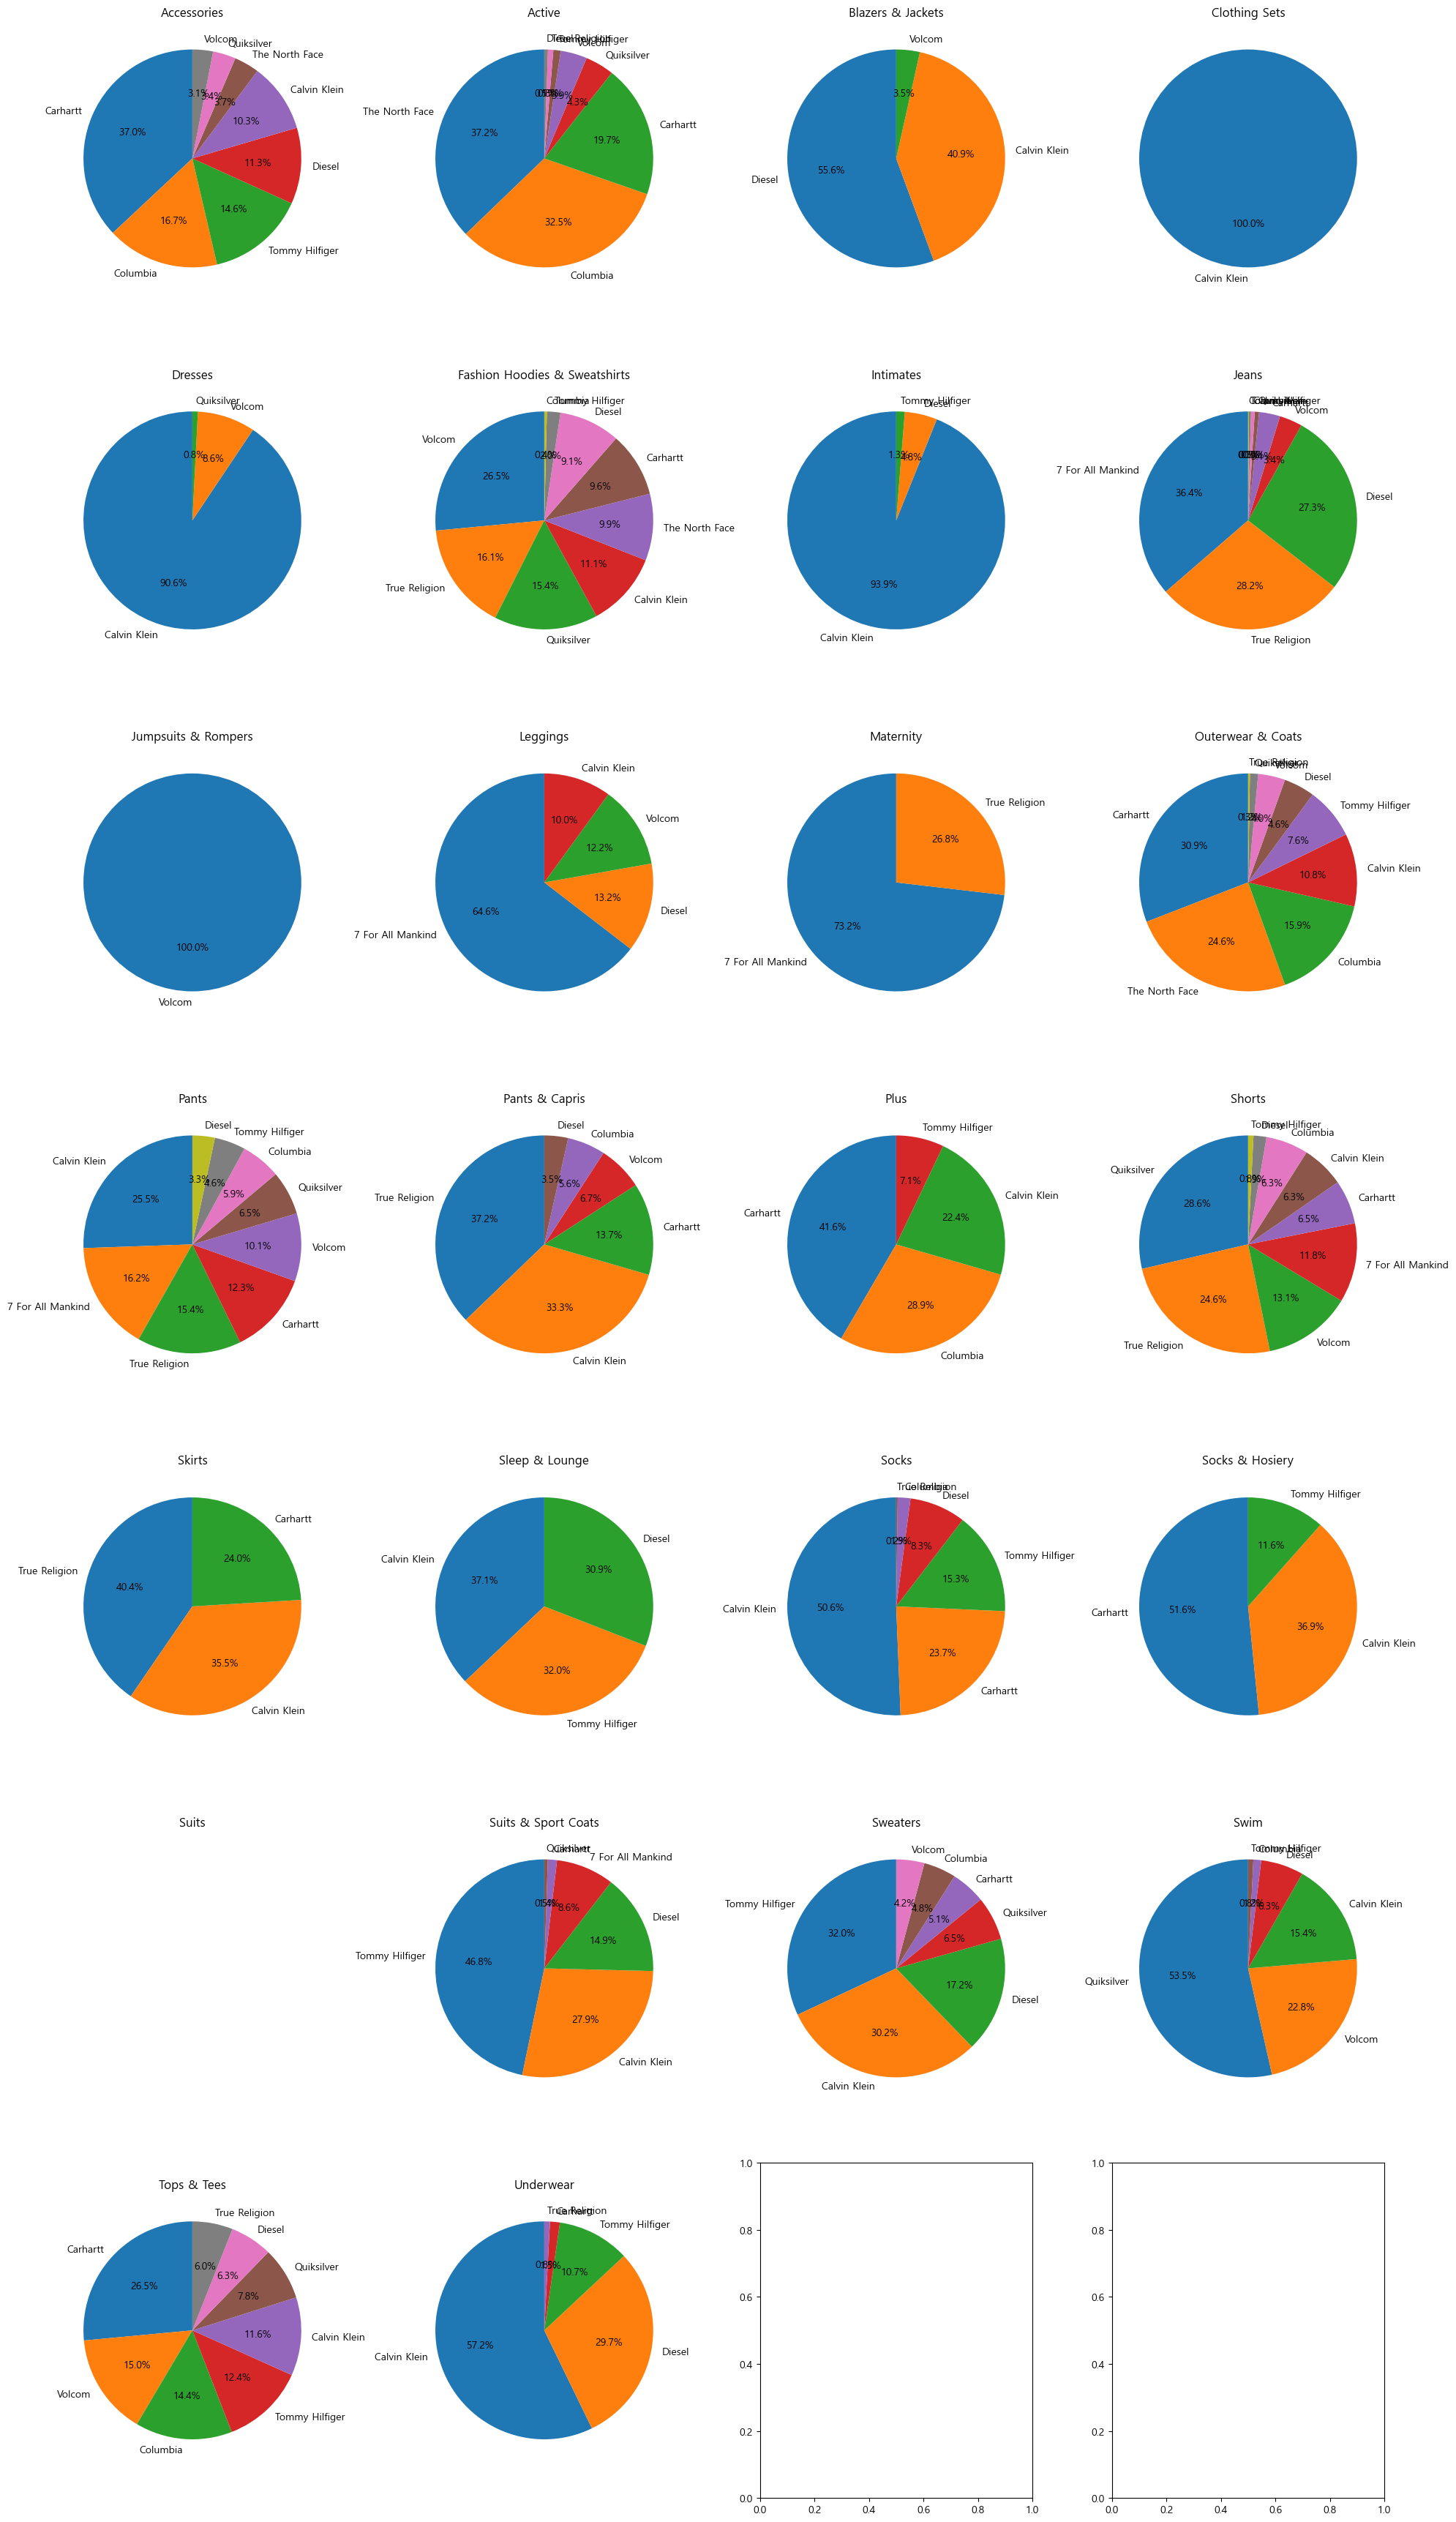

In [25]:
# 데이터프레임에서 상위 브랜드들의 비중이 0인 행 제외
filtered_df = category_sales_top_brands_ratio[category_sales_top_brands_ratio['ratio'] > 0]

# for category, group in filtered_df.groupby('category'):
#     plt.figure(figsize=(8, 6))
#     plt.pie(group['ratio'], labels=group['brand'], autopct='%1.1f%%', startangle=140)
#     plt.title(f'{category} Category Sales Ratio of Top Brands')
#     plt.axis('equal')  # 원 그래프를 원형으로 유지
#     plt.show()

# 카테고리별 원그래프 subplot 그리기
num_categories = filtered_df['category'].nunique()
num_rows = (num_categories + 3) // 4  # 올림 계산

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5 * num_rows))

for i, (category, data) in enumerate(filtered_df.groupby('category')):
    ax = axes[i // 4, i % 4] # row, col
    ax.pie(data['ratio'], labels=data['brand'], autopct='%1.1f%%', startangle=90)
    ax.set_title(category)

plt.tight_layout()
plt.show()


### 필터링 안된 범위에서 비율 구하는 건 실패함... 

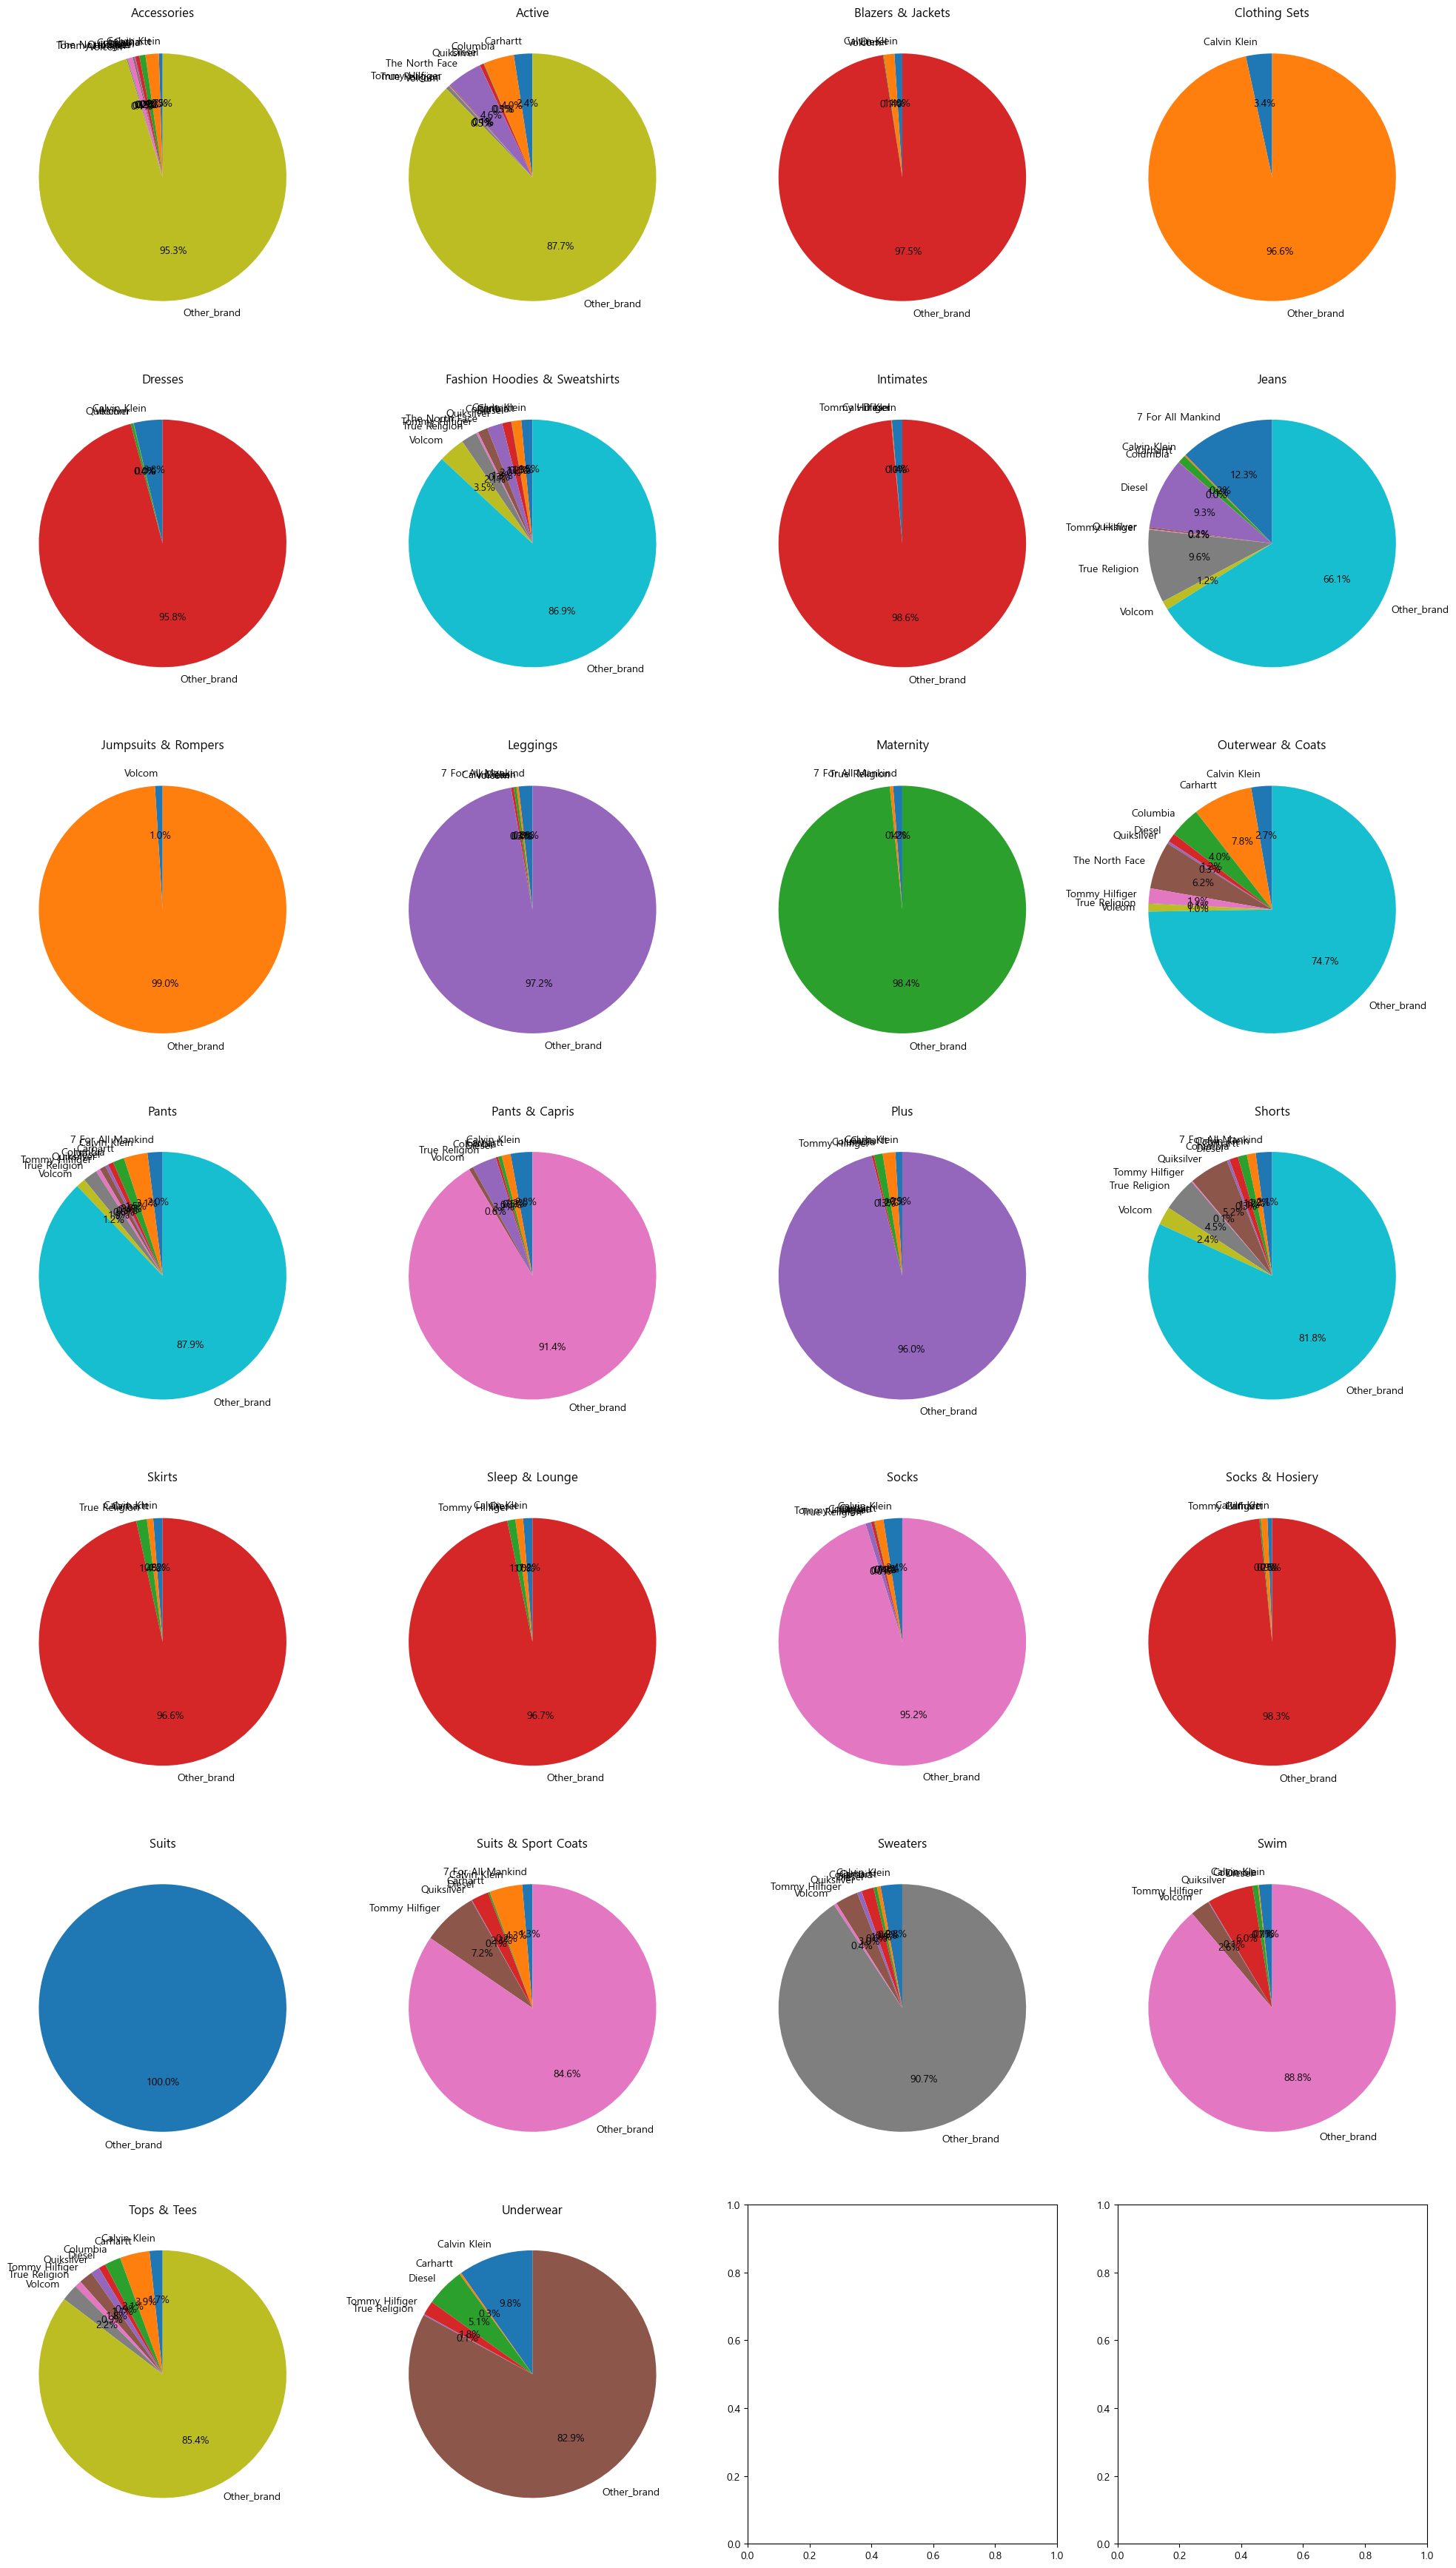

In [27]:
# 전체 카테고리 내 브랜드 비율
num_rows = (result['category'].nunique() + 3) // 4  # 카테고리 수로 한줄에 4개씩, 몇줄 필요할지

fig, axes = plt.subplots(nrows=num_rows, ncols=4, figsize=(20, 5*num_rows))

for i, (category, data) in enumerate(result.groupby('category')):
    ax = axes[i // 4, i % 4] # row, col
    ax.pie(data['category_sale_price_ratio'], labels=data['brand'], autopct='%1.1f%%', startangle=90)
    ax.set_title(category)

plt.tight_layout()
plt.show()

### 각 카테고리에서 상위 5개 브랜드와 그외 비율 비교

In [26]:
# # Define a custom autopct function to adjust label positions
# def autopct_format(values):
#     def my_autopct(pct):
#         total = sum(values)
#         val = int(round(pct*total/100))
#         return '{p:.1f}%\n({v:d})'.format(p=pct,v=val)
#     return my_autopct

# # 카테고리별 원그래프 subplot 그리기
# num_categories = len(filtered_df['category'].unique())
# num_cols = min(num_categories, 3)
# num_rows = (num_categories + 2) // 3  # 올림 계산

# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15*num_cols, 5*num_rows))

# for i, (category, data) in enumerate(filtered_df.groupby('category')):
#     ax = axes[i // num_cols, i % num_cols]
#     ax.pie(data['ratio'], labels=data['brand'], autopct=autopct_format(data['ratio']), startangle=90)
#     ax.set_title(category)

# plt.tight_layout()
# plt.show()


In [27]:
# # 카테고리별 원그래프 subplot 그리기
# num_categories = len(filtered_df['category'].unique())
# num_cols = min(num_categories, 3)
# num_rows = (num_categories + 2) // 3  # 올림 계산

# fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15*num_cols, 5*num_rows))

# for i, (category, data) in enumerate(filtered_df.groupby('category')):
#     ax = axes[i // num_cols, i % num_cols]
#     ax.pie(data['ratio'], labels=data['brand'], startangle=90)

#     # annotation을 사용하여 텍스트 배치
#     total = data['ratio'].sum()
#     ypos = 0
#     for j, (brand, ratio) in enumerate(zip(data['brand'], data['ratio'])):
#         angle = 360 * (ypos + ratio / 2) / total
#         ax.annotate('{:.1f}%'.format(ratio), xy=(0, 0), xytext=(1.3, ypos), textcoords='data', ha='center', va='center', fontsize=10)
#         ypos += ratio

#     ax.set_title(category)

# plt.tight_layout()
# plt.show()


## 카테고리 - 제품이름 별 주문수량

In [27]:
products[products['product_name']=='(One) CHEER Rhinestone Studded Stretch Headband']

,product_id,cost,category,product_name,brand,retail_price,department,sku,distribution_center_id
21537,14086,2.24625,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,Funny Girl Designs,5.99,Women,8EFA9015A4EF4632A954E820ECA834AD,7


In [28]:
order_items[order_items['product_id']==14086]

,order_item_id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
1299,170333,117308,93722,14086,459849,Cancelled,2023-12-31 13:53:16+00:00,NaT,NaT,NaT,5.99
1319,88424,60836,48646,14086,238662,Complete,2023-01-04 01:49:08+00:00,2023-01-04 14:30:00+00:00,2023-01-08 08:47:00+00:00,NaT,5.99
1359,133800,92099,73435,14086,361203,Processing,2023-11-11 05:03:32+00:00,NaT,NaT,NaT,5.99
1392,19349,13390,10754,14086,52236,Shipped,2023-02-12 22:56:27+00:00,2023-02-10 21:47:00+00:00,NaT,NaT,5.99
1396,22892,15847,12670,14086,61772,Shipped,2021-11-01 01:50:27+00:00,2021-11-04 04:48:00+00:00,NaT,NaT,5.99
1441,180114,124064,99082,14086,486294,Shipped,2022-10-06 00:40:00+00:00,2022-10-06 08:20:00+00:00,NaT,NaT,5.99


In [29]:
orders.head(3)

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaT,NaT,NaT,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaT,NaT,NaT,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaT,NaT,NaT,1


In [20]:
orders_complete_merged.groupby(['category', 'product_name'])['num_of_item'].sum().reset_index()[orders_complete_merged.groupby(['category', 'product_name'])['num_of_item'].sum().reset_index()['num_of_item']>0]

,category,product_name,num_of_item
49,Accessories,(ONE) 1 Satin Headband,12
50,Accessories,(One) CHEER Rhinestone Studded Stretch Headband,9
51,Accessories,(Set of 3) Leopard Animal Print Stretch Headband,2
52,Accessories,(Set of 4) 2.5 Glitter Cotton Stretch Headbands,6
53,Accessories,1 1/2 In. Original Perry Suspenders,8
...,...,...,...
702903,Underwear,ck one Men's Cotton Stretch Trunk,14
702904,Underwear,ck one Men's Micro Boxer Brief,15
702905,Underwear,ck one Men's Micro Hip Brief,11
702906,Underwear,ck one Men's Micro Low Rise Trunk,26


In [28]:
# num_of_item 이런식으로 쓰면 안될듯?
popular_products = orders_complete_merged.groupby(['category', 'name'])['num_of_item'].sum().reset_index()
popular_products_except_jeans = orders_complete_merged.query("category != 'Jeans'").groupby(['category', 'name'])['num_of_item'].sum().reset_index()
top_20_products = popular_products.sort_values(by='num_of_item', ascending=False).head(20)
top_20_products_ex_jeans = popular_products_except_jeans.sort_values(by='num_of_item', ascending=False).head(20)

top_20_products

## 청바지 제외하고도 확인 !!!! 

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/685343342.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_products = orders_complete_merged.groupby(['category', 'name'])['num_of_item'].sum().reset_index()
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/685343342.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  popular_products_except_jeans = orders_complete_merged.query("category != 'Jeans'").groupby(['category', 'name'])['num_of_item'].sum().reset_index()


,category,name,num_of_item
215661,Jeans,Wrangler Men's Premium Performance Cowboy Cut ...,93
189769,Jeans,7 For All Mankind Men's Standard Classic Strai...,61
203144,Jeans,Kenneth Cole Men's Straight Leg Jean,53
215660,Jeans,Wrangler Men's Original Cowboy Cut Relaxed Fit...,52
470615,Sleep & Lounge,HUGO BOSS Men's Long Pant,51
213670,Jeans,True Religion Men's Ricky Straight Jean,50
214735,Jeans,Volcom Men's Vorta Slim Straight Leg Fit Jean,47
215675,Jeans,Wrangler Men's Rugged Wear Classic Fit Jean,46
672919,Tops & Tees,Tommy Hilfiger Men Custom Fit Plaid Short Slee...,45
420784,Shorts,Lilly Pulitzer Women's Callahan Short,44


In [29]:
# Jeans 필터링(제외)
top_20_products_except_jeans = top_20_products.query("category != 'Jeans'")
top_20_products_except_jeans

,category,name,num_of_item
470615,Sleep & Lounge,HUGO BOSS Men's Long Pant,51
672919,Tops & Tees,Tommy Hilfiger Men Custom Fit Plaid Short Slee...,45
420784,Shorts,Lilly Pulitzer Women's Callahan Short,44
692752,Underwear,Michael Kors Men's 3 Pack Brief,43
680043,Underwear,Bjorn Borg Men's Side Stetch Solid Boxer Brief,41
159857,Fashion Hoodies & Sweatshirts,UltraClub Adult Sherpa-Lined Full-Zip Fleece w...,41
432000,Shorts,Wrangler Men's Genuine Tampa Cargo Short,40
470601,Sleep & Lounge,HUGO BOSS Men's Hooded Robe,40


In [30]:
# top_10_products 시각화..?

In [31]:
orders_complete_merged.columns

Index(['id_x', 'order_id', 'user_id', 'product_id', 'inventory_item_id',
       'status', 'created_at', 'shipped_at', 'delivered_at', 'returned_at',
       'sale_price', 'id_y', 'cost', 'category', 'name', 'brand',
       'retail_price', 'department', 'sku', 'distribution_center_id',
       'num_of_item', 'profit'],
      dtype='object')

# 연도별 매출-비용-수익 추이

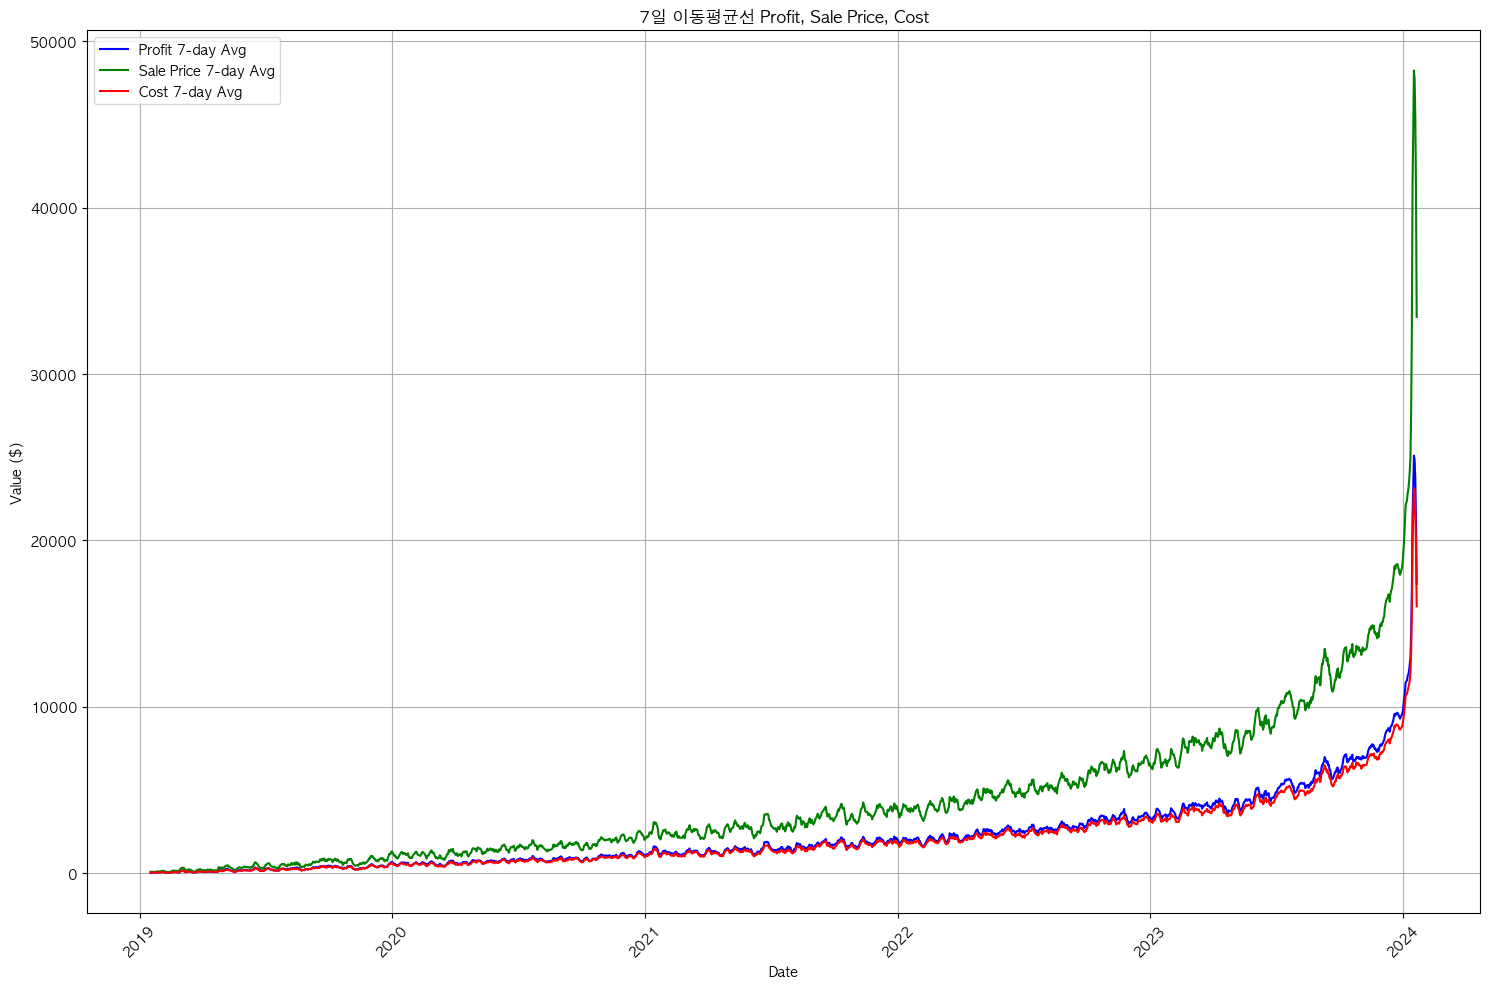

In [32]:
# 연도별 그룹핑
grouped_by_year = orders_complete_merged.groupby(orders_complete_merged['created_at'].dt.date)[['profit', 'sale_price', 'cost']].sum().reset_index()


plt.figure(figsize=(15, 10))

for column in ['profit', 'sale_price', 'cost']:
    grouped_by_year[column+'_7day_avg'] = grouped_by_year[column].rolling(window=7).mean()
grouped_by_year = grouped_by_year.dropna()

# profit
plt.plot(grouped_by_year['created_at'], grouped_by_year['profit_7day_avg'], label='Profit 7-day Avg', color='blue')

# sale price
plt.plot(grouped_by_year['created_at'], grouped_by_year['sale_price_7day_avg'], label='Sale Price 7-day Avg', color='green')

# cost
plt.plot(grouped_by_year['created_at'], grouped_by_year['cost_7day_avg'], label='Cost 7-day Avg', color='red')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('7일 이동평균선 Profit, Sale Price, Cost')
plt.legend()

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


# top 카테고리의 연도별 매출액 추이

In [33]:
# target_category = 'Outerwear & Coats'
# t1 = orders_complete_merged[orders_complete_merged['category'] == target_category]

# # 연도별 그룹핑
# grouped_by_year_t1 = t1.groupby(orders_complete_merged['created_at'].dt.date)[['profit', 'sale_price', 'cost']].sum().reset_index()


# grouped_by_year_t1['sale_price_7day_avg'] = grouped_by_year_t1['sale_price'].rolling(window=7).mean()
# grouped_by_year = grouped_by_year.dropna()


# plt.figure(figsize=(15, 10))
# plt.plot(grouped_by_year_t1['created_at'], grouped_by_year_t1['sale_price_7day_avg'], label='Sale Price 7-day Avg', color='green')
# # Adding labels and title
# plt.xlabel('Date')
# plt.ylabel('Value ($)')
# plt.title('7일 이동평균선 Profit, Sale Price, Cost')
# plt.legend()
# # Displaying the plot
# plt.grid(True)
# plt.tight_layout()
# plt.show()


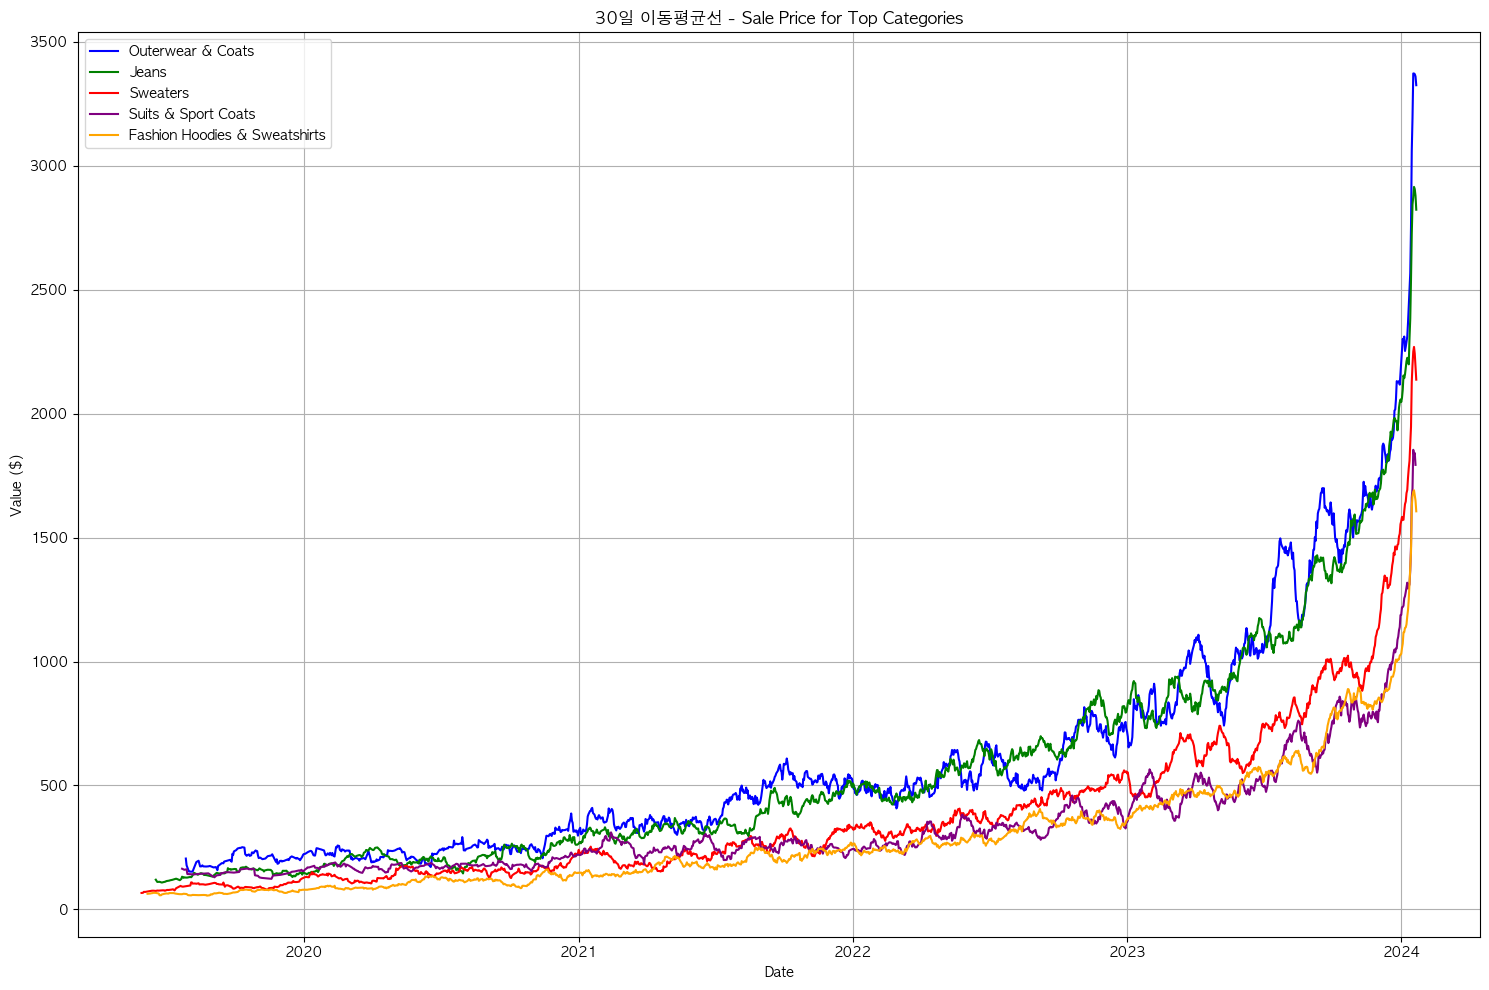

In [34]:
# 색깔 리스트
colors = ['blue', 'green', 'red', 'purple', 'orange']

# 새로운 figure 생성
plt.figure(figsize=(15, 10))

# top_cat_performers 리스트의 각 카테고리에 대해 반복하여 그래프를 그림
for i, target_category in enumerate(top_cat_performers_list):
    t1 = orders_complete_merged[orders_complete_merged['category'] == target_category]

    # 연도별 그룹핑
    grouped_by_year_t1 = t1.groupby(orders_complete_merged['created_at'].dt.date)[['profit', 'sale_price', 'cost']].sum().reset_index()

    # 7일 이동평균 계산
    grouped_by_year_t1['sale_price_7day_avg'] = grouped_by_year_t1['sale_price'].rolling(window=30).mean()
    grouped_by_year_t1 = grouped_by_year_t1.dropna()

    # 그래프 그리기
    plt.plot(grouped_by_year_t1['created_at'], grouped_by_year_t1['sale_price_7day_avg'], label=target_category, color=colors[i])

# 축 레이블과 제목 추가
plt.xlabel('Date')
plt.ylabel('Value ($)')
plt.title('30일 이동평균선 - Sale Price for Top Categories')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 전년 대비 매출 상승률

## 전체 카테고리

In [35]:
orders_complete_merged['year'] = orders_complete_merged['created_at'].dt.year
orders_complete_merged['month'] = orders_complete_merged['created_at'].dt.month
orders_complete_merged_202311 = orders_complete_merged[orders_complete_merged['created_at'] < '2023-12-01']
orders_complete_merged_202311.created_at.max()

Timestamp('2023-11-30 23:58:54+0000', tz='UTC')

In [36]:
growth_rate = orders_complete_merged_202311.groupby('year')[['sale_price']].sum().reset_index()

growth_rate['sales_growth_rate'] = growth_rate['sale_price'].pct_change()*100

growth_rate

,year,sale_price,sales_growth_rate
0,2019,1.651741e+05,NaN
1,2020,5.621470e+05,240.336007
2,2021,1.090479e+06,93.984737
3,2022,1.867970e+06,71.298022
4,2023,3.279149e+06,75.546195


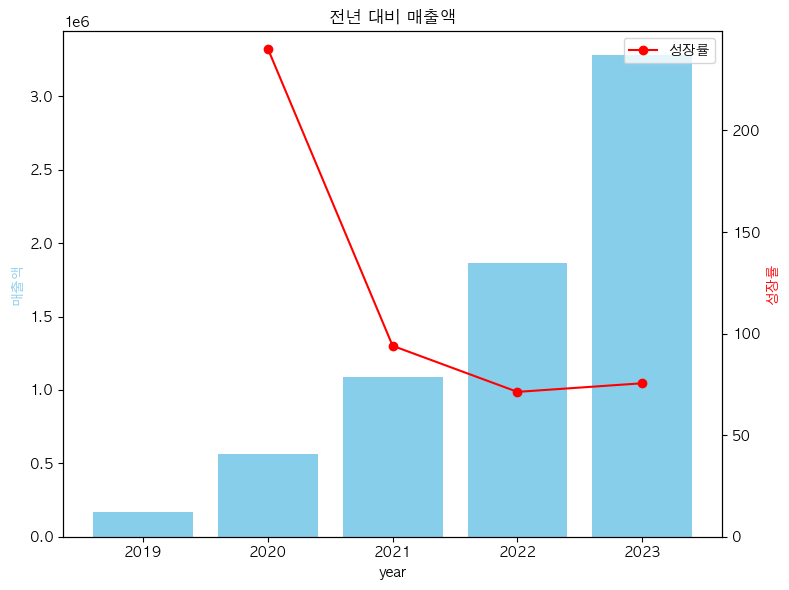

In [37]:
# 서브플롯 생성
fig, ax1 = plt.subplots(figsize=(8, 6))

# 매출액 막대 그래프
ax1.bar(growth_rate['year'], growth_rate['sale_price'], color='skyblue')
ax1.set_xlabel('year')
ax1.set_ylabel('매출액', color='skyblue')
ax1.set_title('전년 대비 매출액')
ax1.tick_params(axis='y')

# 성장률 선 그래프
ax2 = ax1.twinx()
ax2.plot(growth_rate['year'], growth_rate['sales_growth_rate'], marker='o', color='red')
ax2.set_ylabel('성장률', color='red')
ax2.set_ylim(0, None)  # 성장률은 음수가 될 수 없으므로 y축의 최소값을 0으로 설정
ax2.legend(['성장률'], loc='upper right')

# for i, v in enumerate(growth_rate['sales_growth_rate']):
#     ax2.text(i, v + 0.02, str(round(v,2)), ha='center', va='bottom')

# fig.suptitle('전년 대비 매출액 및 성장률', fontsize=16)
fig.tight_layout()
plt.xticks(rotation=45)  # x축 레이블 회전
plt.show()

## 매출 Top6 category 연도별 매출액 및 매출 상승률

In [38]:
category_performance2 = orders_complete_merged_202311.groupby('category')[['profit', 'sale_price', 'cost']].sum().reset_index()
top_cat_performers2 = category_performance2.sort_values(by='sale_price', ascending=False).head(6)
top_cat_performers2

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/2845308071.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance2 = orders_complete_merged_202311.groupby('category')[['profit', 'sale_price', 'cost']].sum().reset_index()


,category,profit,sale_price,cost
11,Outerwear & Coats,465557.840936,838461.459509,372903.618573
7,Jeans,377749.629966,812945.741300,435196.111334
22,Sweaters,279876.332772,539733.620129,259857.287356
21,Suits & Sport Coats,251808.058194,421061.279623,169253.221429
5,Fashion Hoodies & Sweatshirts,200649.867416,418197.470337,217547.602921
23,Swim,204537.069516,418049.070469,213512.000953


In [39]:
category_performance_limit = orders_complete_merged_202311.groupby(['year','category'])[['profit', 'sale_price', 'cost']].sum().reset_index()
top_cat_performers_by_year = category_performance_limit.groupby('year').apply(lambda x: x.nlargest(6, 'sale_price')).reset_index(drop=True)

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/1203405785.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_performance_limit = orders_complete_merged_202311.groupby(['year','category'])[['profit', 'sale_price', 'cost']].sum().reset_index()
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/1203405785.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_cat_performers_by_year = category_performance_limit.groupby('year').apply(lambda x: x.nlargest(6, 'sale_price')).

In [40]:
category_performance_limit

,year,category,profit,sale_price,cost
0,2019,Accessories,3225.733130,5399.480002,2173.746872
1,2019,Active,3517.963356,6032.170012,2514.206656
2,2019,Blazers & Jackets,1941.384725,3138.590007,1197.205282
3,2019,Clothing Sets,108.484882,295.990002,187.505120
4,2019,Dresses,2824.062308,5184.510009,2360.447701
...,...,...,...,...,...
125,2023,Suits & Sport Coats,117157.430194,195777.439765,78620.009571
126,2023,Sweaters,131383.023888,253315.610080,121932.586192
127,2023,Swim,95368.998458,195500.690177,100131.691719
128,2023,Tops & Tees,64593.227402,146744.940491,82151.713089


In [41]:
top_cat_performers_by_year

,year,category,profit,sale_price,cost
0,2019,Outerwear & Coats,12827.797146,23132.520031,10304.722885
1,2019,Jeans,8197.820002,17798.290016,9600.470014
2,2019,Sweaters,6729.488042,12912.849979,6183.361937
3,2019,Suits & Sport Coats,6640.168996,11136.550001,4496.381005
4,2019,Swim,4815.688584,9980.420015,5164.731432
5,2019,Fashion Hoodies & Sweatshirts,4616.816957,9392.119987,4775.303029
6,2020,Jeans,29050.382870,62493.170040,33442.787170
7,2020,Outerwear & Coats,34495.613539,62078.239941,27582.626402
8,2020,Sweaters,22680.042919,43779.379996,21099.337077
9,2020,Suits & Sport Coats,20853.808619,35075.540013,14221.731395


In [42]:
top_6_category = ['Outerwear & Coats', 'Jeans', 'Sweaters', 'Suits & Sport Coats', 'Fashion Hoodies & Sweatshirts', 'Swim']

In [43]:
# 하나만 뽑는 그래프 코드만 남겨둠

# fashionhoodie = top_cat_performers_by_year[top_cat_performers_by_year['category']=='Fashion Hoodies & Sweatshirts']
# fashionhoodie['sales_growth_rate'] = fashionhoodie['sale_price'].pct_change()*100

# fig, ax1 = plt.subplots(figsize=(8, 6))

# # 매출액 막대 그래프
# ax1.bar(fashionhoodie['year'], fashionhoodie['sale_price'], color='skyblue')
# ax1.set_xlabel('year')
# ax1.set_ylabel('매출액', color='skyblue')
# ax1.set_title('Fashion Hoodies & Sweatshirts 매출 증가율')
# ax1.tick_params(axis='y')

# # 성장률 선 그래프
# ax2 = ax1.twinx()
# ax2.plot(fashionhoodie['year'], fashionhoodie['sales_growth_rate'], marker='o', color='red')
# ax2.set_ylabel('성장률', color='red')
# ax2.set_ylim(0, None)  # 성장률은 음수가 될 수 없으므로 y축의 최소값을 0으로 설정
# ax2.legend(['성장률'], loc='upper right')
# fig.tight_layout()
# plt.xticks(rotation=45)  
# plt.show()

/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/54712371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['sales_growth_rate'] = category_data['sale_price'].pct_change() * 100
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/54712371.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  category_data['sales_growth_rate'] = category_data['sale_price'].pct_change() * 100
/var/folders/qv/tqmmyp0s5dj996k_tcvqmtqm0000gn/T/ipykernel_6757/54712371.py:7: SettingWithCopy

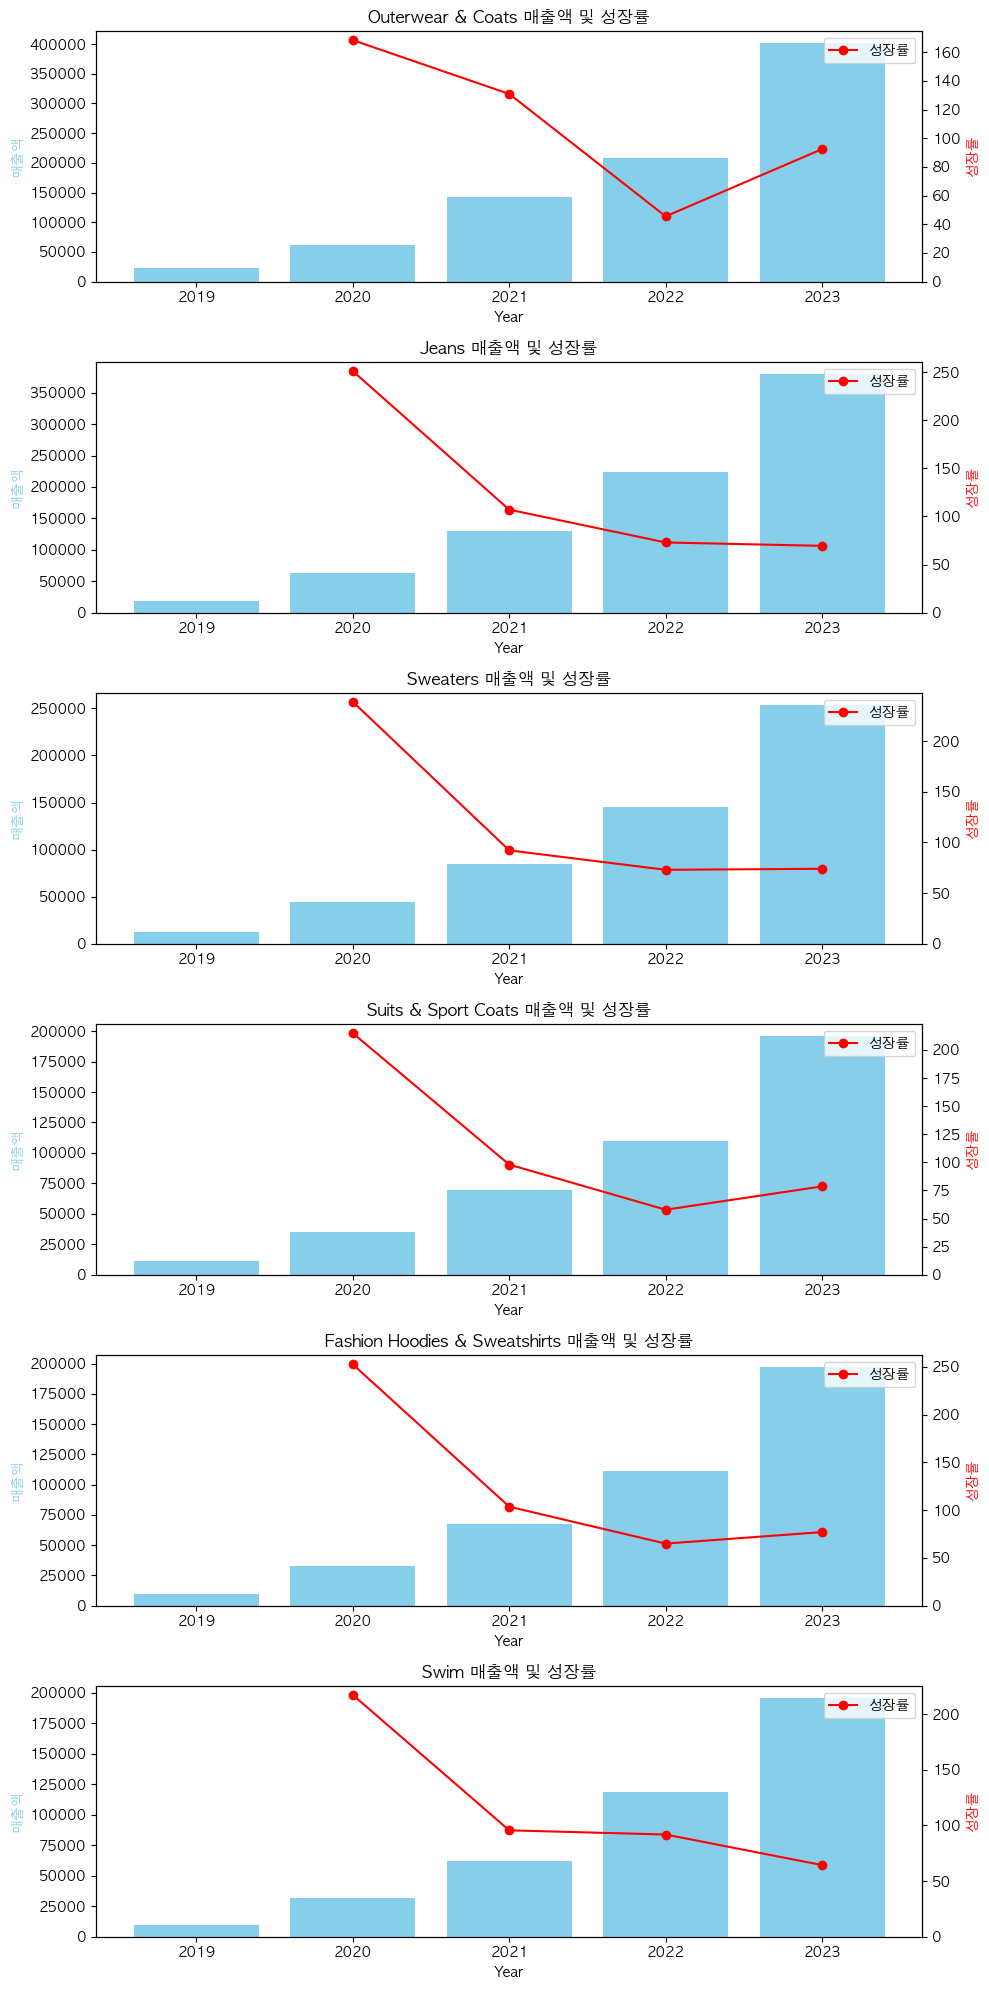

In [44]:
top_6_categories = ['Outerwear & Coats', 'Jeans', 'Sweaters', 'Suits & Sport Coats', 'Fashion Hoodies & Sweatshirts', 'Swim']

fig, axes = plt.subplots(nrows=len(top_6_categories), figsize=(10, 20))

for i, category in enumerate(top_6_categories):
    category_data = category_performance_limit[category_performance_limit['category'] == category]
    category_data['sales_growth_rate'] = category_data['sale_price'].pct_change() * 100
    
    ax1 = axes[i]
    # 매출액 막대 그래프
    ax1.bar(category_data['year'], category_data['sale_price'], color='skyblue')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('매출액', color='skyblue')
    ax1.set_title(f'{category} 매출액 및 성장률')
    ax1.tick_params(axis='y')

    ax2 = ax1.twinx()
    # 성장률 선 그래프
    ax2.plot(category_data['year'], category_data['sales_growth_rate'], marker='o', color='red')
    ax2.set_ylabel('성장률', color='red')
    ax2.set_ylim(0, None)
    ax2.legend(['성장률'], loc='upper right')

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()
